## PoketMon 데이터 분석


In [22]:
import nltk
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kimjunseok\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
data = pd.read_csv('C:/Users/kimjunseok/Downloads/13. data/Pokemon.csv')
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [24]:
#network analysis

g = nx.Graph()
g = nx.from_pandas_edgelist(data , source= 'Name', target= 'Type 1')
print(nx.info(g))

Graph with 818 nodes and 800 edges


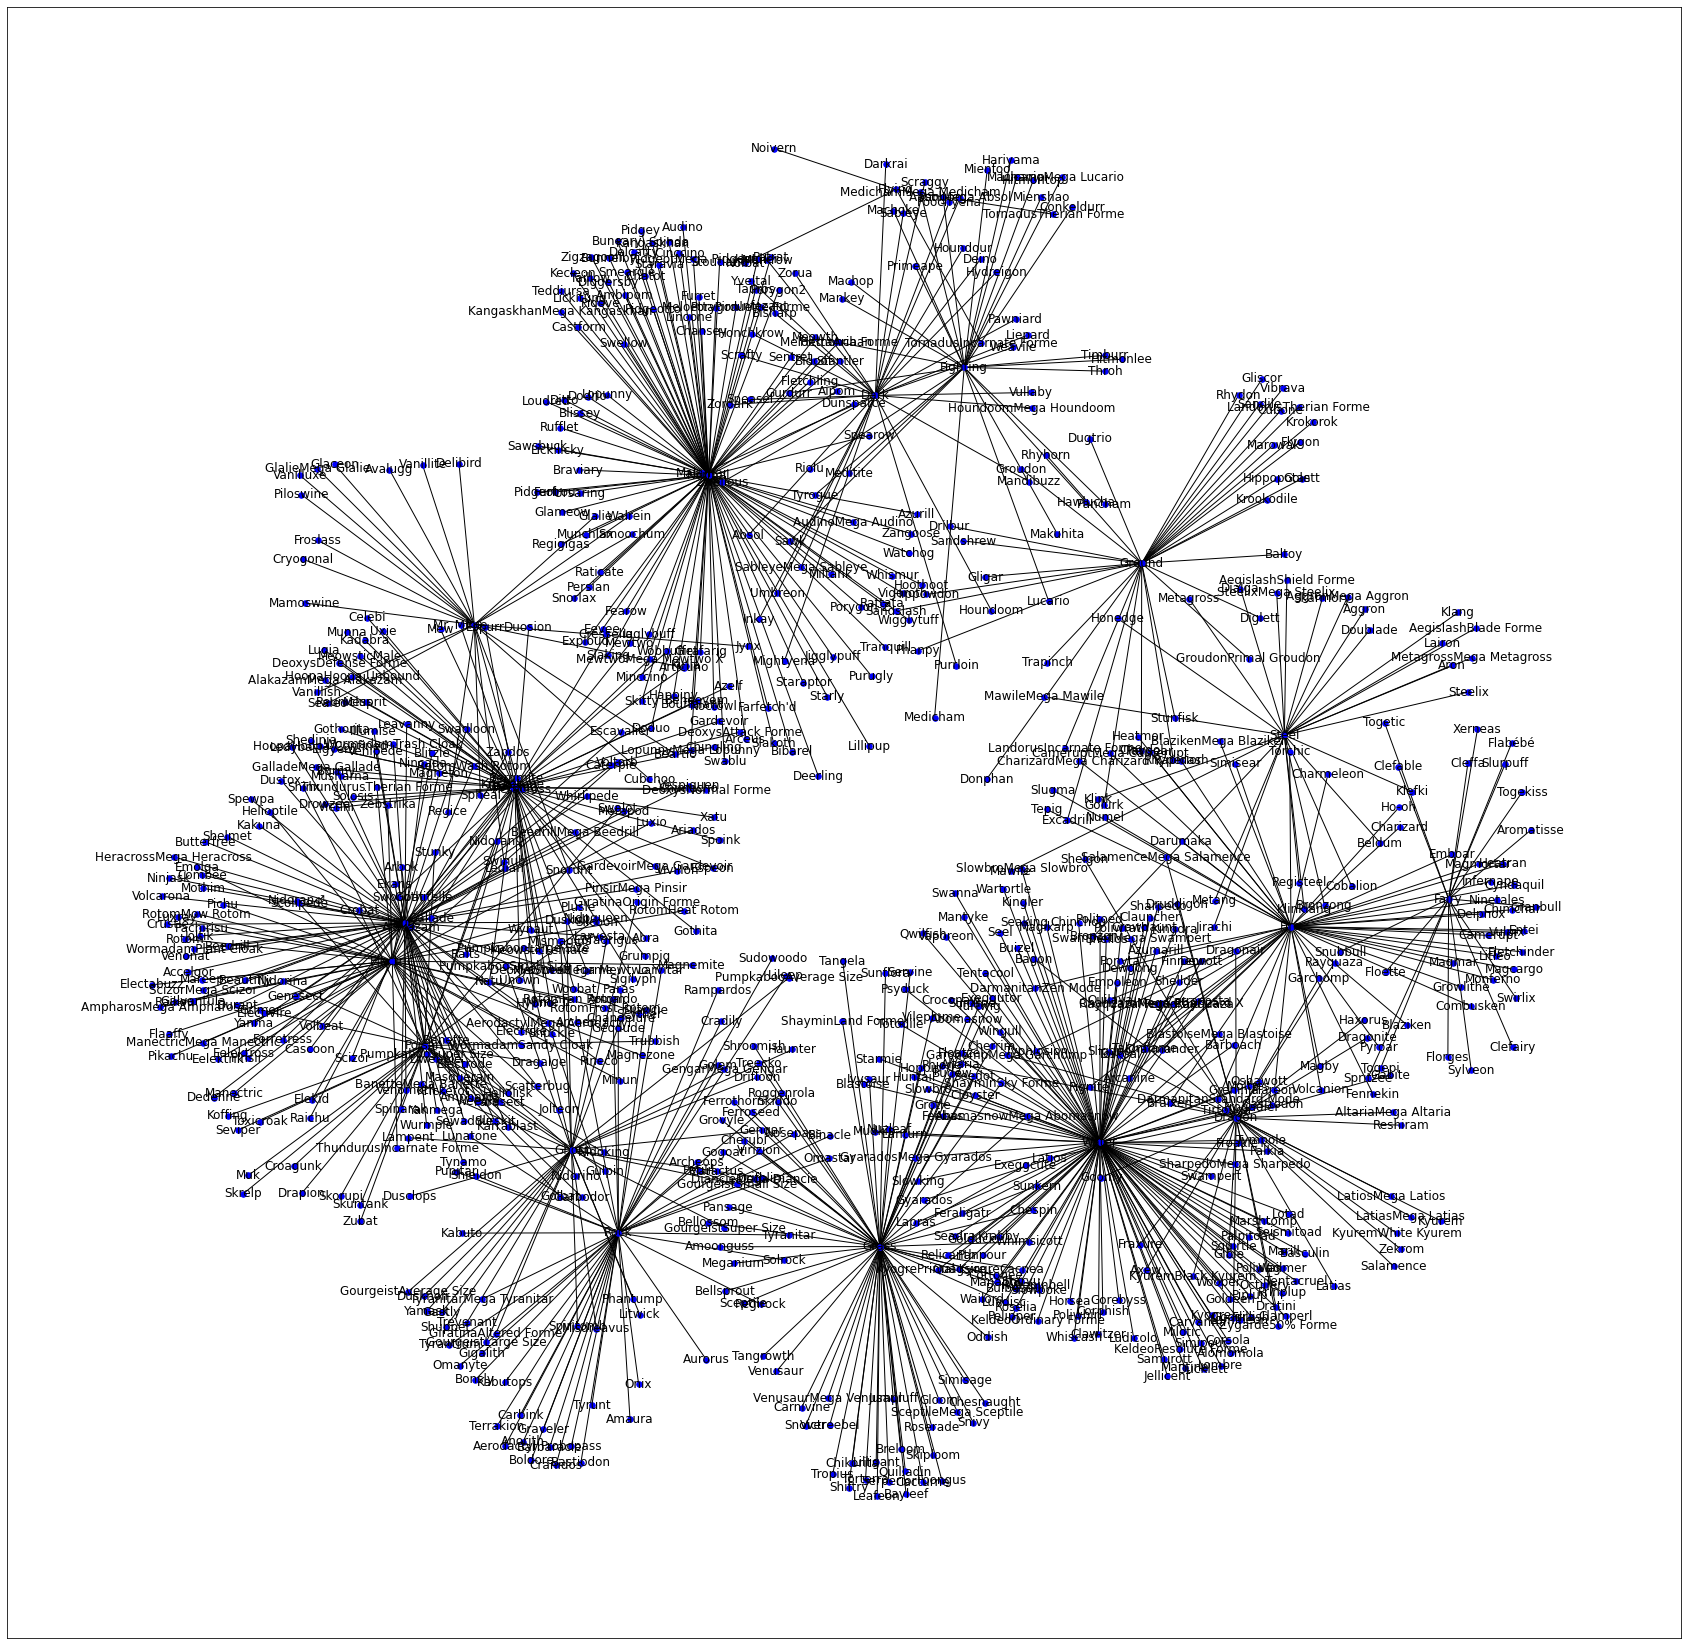

In [25]:
plt.figure(figsize= (30, 30))
pos = nx.spring_layout(g, k = 0.15)
nx.draw_networkx(g, pos, node_size =30, node_color = 'blue')
plt.show()

## 왕좌의 게임 등장인물 관계망 분석

In [26]:
df = pd.read_csv("C:/Users/kimjunseok/Downloads/13. data/asoiaf-all-edges.csv")
df

,Source,Target,Type,id,weight
0,Addam-Marbrand,Brynden-Tully,Undirected,0,3
1,Addam-Marbrand,Cersei-Lannister,Undirected,1,3
2,Addam-Marbrand,Gyles-Rosby,Undirected,2,3
3,Addam-Marbrand,Jaime-Lannister,Undirected,3,14
4,Addam-Marbrand,Jalabhar-Xho,Undirected,4,3
...,...,...,...,...,...
2818,Walder-Frey-(son-of-Merrett),Wex-Pyke,Undirected,2818,4
2819,Waymar-Royce,Will-(prologue),Undirected,2819,18
2820,Weasel,Weese,Undirected,2820,6
2821,Woth,Yoren,Undirected,2821,4


In [27]:
G = nx.from_pandas_edgelist(df, source='Source', target = 'Target')

print(len(G.nodes()))
print(len(G.edges()))

796
2823


In [28]:
deg_cen = nx.degree_centrality(G)

In [29]:
deg_cen

{'Addam-Marbrand': 0.01509433962264151,
 'Brynden-Tully': 0.023899371069182388,
 'Cersei-Lannister': 0.1220125786163522,
 'Gyles-Rosby': 0.022641509433962263,
 'Jaime-Lannister': 0.1270440251572327,
 'Jalabhar-Xho': 0.006289308176100628,
 'Joffrey-Baratheon': 0.08679245283018867,
 'Kevan-Lannister': 0.021383647798742137,
 'Lyle-Crakehall': 0.006289308176100628,
 'Oberyn-Martell': 0.025157232704402514,
 'Tyrion-Lannister': 0.15345911949685534,
 'Tywin-Lannister': 0.06037735849056604,
 'Varys': 0.042767295597484274,
 'Aegon-Frey-(son-of-Stevron)': 0.005031446540880503,
 'Catelyn-Stark': 0.09433962264150943,
 'Robb-Stark': 0.0930817610062893,
 'Stevron-Frey': 0.006289308176100628,
 'Walder-Frey': 0.023899371069182388,
 'Aegon-I-Targaryen': 0.011320754716981131,
 'Daenerys-Targaryen': 0.09182389937106918,
 'Eddard-Stark': 0.0930817610062893,
 'Harren-Hoare': 0.0037735849056603774,
 'Nan': 0.010062893081761006,
 'Rhaenys-Targaryen': 0.0025157232704402514,
 'Stannis-Baratheon': 0.11194968553

In [30]:
sorted(deg_cen.items(), key=lambda x:x[1], reverse = True)[0:5]

[('Tyrion-Lannister', 0.15345911949685534),
 ('Jon-Snow', 0.14339622641509434),
 ('Jaime-Lannister', 0.1270440251572327),
 ('Cersei-Lannister', 0.1220125786163522),
 ('Stannis-Baratheon', 0.11194968553459118)]

In [31]:
page_rank =nx.pagerank(G)
sorted(page_rank.items(), key=lambda x:x[1], reverse = True)[0:5]

[('Jon-Snow', 0.018999569248566855),
 ('Tyrion-Lannister', 0.018341232619311046),
 ('Jaime-Lannister', 0.015437447356269757),
 ('Stannis-Baratheon', 0.013648810781186758),
 ('Arya-Stark', 0.013432050115231258)]

In [32]:
clos_cen = nx.closeness_centrality(G)
sorted(clos_cen.items(), key=lambda x:x[1], reverse = True)[0:5]

[('Tyrion-Lannister', 0.4763331336129419),
 ('Robert-Baratheon', 0.4592720970537262),
 ('Eddard-Stark', 0.455848623853211),
 ('Cersei-Lannister', 0.45454545454545453),
 ('Jaime-Lannister', 0.4519613416714042)]

In [33]:
bet_cen = nx.betweenness_centrality(G)
sorted(bet_cen.items(), key=lambda x:x[1], reverse = True)[0:5]

[('Jon-Snow', 0.1921196196835449),
 ('Tyrion-Lannister', 0.1621910961115984),
 ('Daenerys-Targaryen', 0.11841801916269204),
 ('Theon-Greyjoy', 0.11128331813470228),
 ('Stannis-Baratheon', 0.11013955266679566)]

## facebook network analysis

In [34]:
facebook = pd.read_csv('C:/Users/kimjunseok/Downloads/13. data/facebook_combined.txt.gz', compression= 'gzip', sep=' ', names=['start_node', 'end_node'])

facebook

,start_node,end_node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


In [35]:
## 그래프 정의

G = nx.from_pandas_edgelist(facebook, 'start_node', 'end_node')

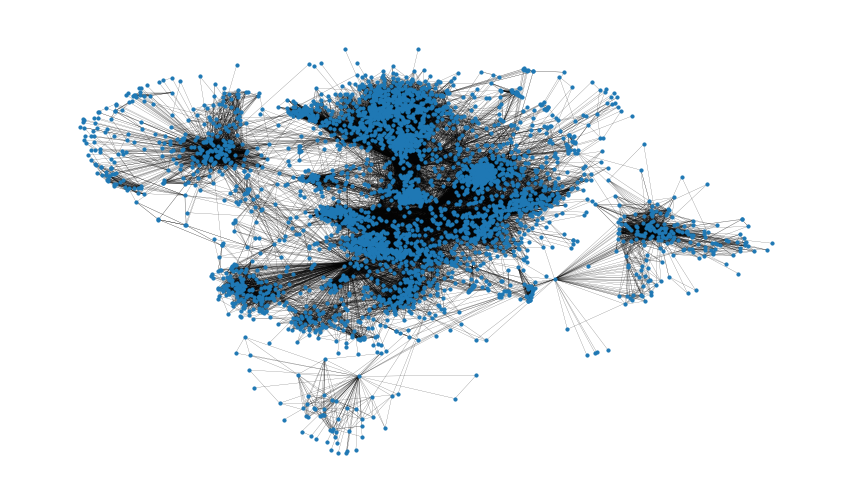

In [36]:
## 그래프 시각화
pos = nx.spring_layout(G, iterations= 15, seed = 1721)
fig , ax = plt.subplots(figsize = (15, 9))
ax.axis('off')
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos = pos, ax = ax , **plot_options) 

In [37]:
## 그래프 형상(topological attributes) 분석

print("Nodes : ", G.number_of_nodes())

Nodes :  4039


In [38]:
print("Edges : ", G.number_of_edges())

Edges :  88234


In [39]:
#maximum shortest paths --> diameter

shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))
diameter = max(nx.eccentricity(G, sp = shortest_path_lengths).values())
diameter

8

In [42]:
## compute the average shortest path length for each node
import numpy as np
average_path_lengths =[
    np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
    
]

# The average over all nodes
np.mean(average_path_lengths)

3.691592636562027

In [43]:
## create an array to store values from 0 up to (and including) diameter
path_lengths = np.zeros(diameter + 1, dtype= int)
path_lengths

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

Text(0, 0.5, 'Frequency (%)')

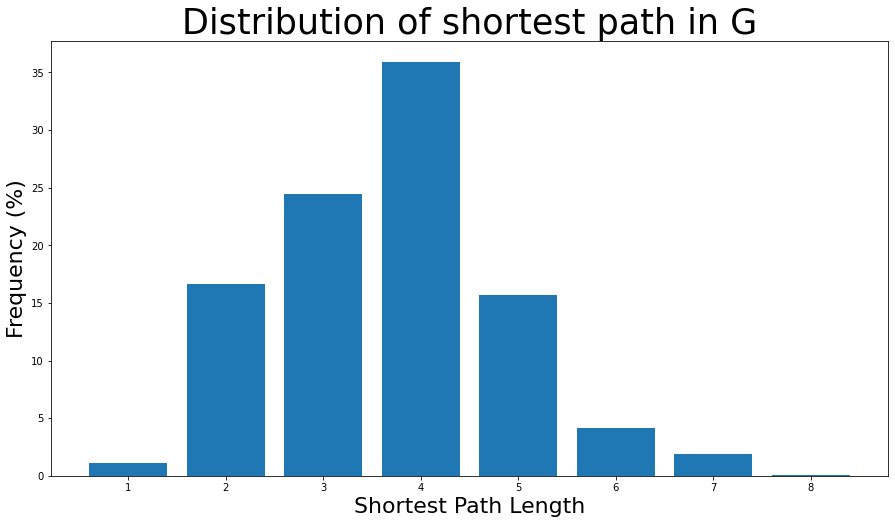

In [44]:
#Extract the frequency of  shortest path lengths between two nodes

for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts = True)
    path_lengths[pl] += cnts

#Express frequency distribution as a percentage (ignoring path Length of 0)
freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()


fig , ax = plt.subplots(figsize = (15, 8))
ax.bar(np.arange(1, diameter + 1), height= freq_percent)
ax.set_title(
    'Distribution of shortest path in G', fontdict = {'size' : 35}, loc = 'center'
)

ax.set_xlabel('Shortest Path Length', fontdict= {'size' : 22})
ax.set_ylabel('Frequency (%)', fontdict={'size': 22})

In [45]:
## Centrality measures

deg_cen = nx.degree_centrality(G)

sorted(deg_cen.items(), key = lambda x : x[1], reverse=True)[0:10]

[(107, 0.258791480931154),
 (1684, 0.1961367013372957),
 (1912, 0.18697374938088163),
 (3437, 0.13546310054482416),
 (0, 0.08593363051015354),
 (2543, 0.07280832095096582),
 (2347, 0.07206537890044576),
 (1888, 0.0629024269440317),
 (1800, 0.06067360079247152),
 (1663, 0.058197127290737984)]

In [46]:

clos_cen = nx.closeness_centrality(G)

sorted(clos_cen.items(), key = lambda x : x[1], reverse=True)[0:10]

[(107, 0.45969945355191255),
 (58, 0.3974018305284913),
 (428, 0.3948371956585509),
 (563, 0.3939127889961955),
 (1684, 0.39360561458231796),
 (171, 0.37049270575282134),
 (348, 0.36991572004397216),
 (483, 0.3698479575013739),
 (414, 0.3695433330282786),
 (376, 0.36655773420479304)]

In [47]:

eigen_cen = nx.eigenvector_centrality(G)

sorted(eigen_cen.items(), key = lambda x : x[1], reverse=True)[0:10]

[(1912, 0.09540696149067629),
 (2266, 0.08698327767886553),
 (2206, 0.08605239270584343),
 (2233, 0.08517340912756598),
 (2464, 0.08427877475676092),
 (2142, 0.08419311897991796),
 (2218, 0.08415573568055032),
 (2078, 0.08413617041724979),
 (2123, 0.08367141238206226),
 (1993, 0.0835324284081597)]

# 의미 연결망 분석 

In [48]:
from nltk import word_tokenize , bigrams

sentence = "I love data science and deep learning"
tokens = word_tokenize(sentence)

bgram = bigrams(tokens)
bgram_list = [x for x in bgram]

print(bgram_list)

[('I', 'love'), ('love', 'data'), ('data', 'science'), ('science', 'and'), ('and', 'deep'), ('deep', 'learning')]


In [49]:
from nltk.util import ngrams

tgram = ngrams(tokens, 3)
qgram = ngrams(tokens, 4)

tgram_list = [x for x in tgram]
qgram_list = [x for x in qgram]

print(tgram_list)
print(qgram_list)

[('I', 'love', 'data'), ('love', 'data', 'science'), ('data', 'science', 'and'), ('science', 'and', 'deep'), ('and', 'deep', 'learning')]
[('I', 'love', 'data', 'science'), ('love', 'data', 'science', 'and'), ('data', 'science', 'and', 'deep'), ('science', 'and', 'deep', 'learning')]


### 어휘 동사 출현 빈도의 계수화

In [50]:
from nltk import ConditionalFreqDist

sentences = ['I love data science and deep learning', 'I love science', 'I know this code']
tokens = [word_tokenize(x) for x in sentences]
bgrams = [bigrams(x, pad_left = True, pad_right = True,
                  left_pad_symbol = "SS", right_pad_symbol = "SE") for x in tokens]

token = []

for i in bgrams:
    token += ([x for x in i])
    
cfd = ConditionalFreqDist(token)
cfd.conditions()

['SS',
 'I',
 'love',
 'data',
 'science',
 'and',
 'deep',
 'learning',
 'know',
 'this',
 'code']

In [51]:
print(cfd['I'])

<FreqDist with 2 samples and 3 outcomes>


In [52]:
print(cfd['I']['love'])

2


In [53]:
print(cfd['I'].most_common(1))

[('love', 2)]


In [54]:
import numpy as np
freq_matrix = []

for i in cfd.keys():
    temp = []
    for j in cfd.keys():
        temp.append(cfd[i][j])
    freq_matrix.append(temp)
freq_matrix = np.array(freq_matrix)

print(cfd.keys())
print(freq_matrix)

dict_keys(['SS', 'I', 'love', 'data', 'science', 'and', 'deep', 'learning', 'know', 'this', 'code'])
[[0 3 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 1 0 0]
 [0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0]]


In [55]:
import  pandas as pd
df = pd.DataFrame(freq_matrix , index = cfd.keys(), columns = cfd.keys())
df.style.background_gradient(cmap = 'coolwarm')

,SS,I,love,data,science,and,deep,learning,know,this,code
SS,0,3,0,0,0,0,0,0,0,0,0
I,0,0,2,0,0,0,0,0,1,0,0
love,0,0,0,1,1,0,0,0,0,0,0
data,0,0,0,0,1,0,0,0,0,0,0
science,0,0,0,0,0,1,0,0,0,0,0
and,0,0,0,0,0,0,1,0,0,0,0
deep,0,0,0,0,0,0,0,1,0,0,0
learning,0,0,0,0,0,0,0,0,0,0,0
know,0,0,0,0,0,0,0,0,0,1,0
this,0,0,0,0,0,0,0,0,0,0,1


In [56]:

import networkx as nx
G = nx.from_pandas_adjacency(df)

print(G.nodes())
print(G.edges())

['SS', 'I', 'love', 'data', 'science', 'and', 'deep', 'learning', 'know', 'this', 'code']
[('SS', 'I'), ('I', 'love'), ('I', 'know'), ('love', 'data'), ('love', 'science'), ('data', 'science'), ('science', 'and'), ('and', 'deep'), ('deep', 'learning'), ('know', 'this'), ('this', 'code')]


In [57]:
#특정 연결선의 가중치 확인 --> 빈도

print(G.edges()['I', 'love'])
print(G.edges()['I', 'know'])


{'weight': 2}
{'weight': 1}


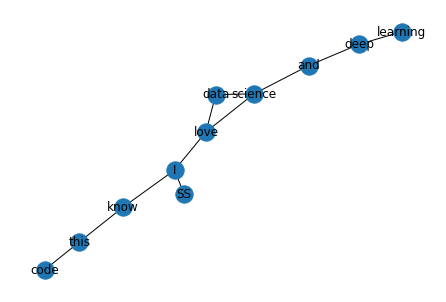

In [58]:
#그래프 시각화
nx.draw(G, with_labels = True)

In [60]:
## 조건부확률 추정

from nltk.probability import ConditionalProbDist , MLEProbDist

cpd = ConditionalProbDist(cfd, MLEProbDist)
cpd.conditions()

['SS',
 'I',
 'love',
 'data',
 'science',
 'and',
 'deep',
 'learning',
 'know',
 'this',
 'code']

In [62]:
prob_matrix = []

for i in cpd.keys():
    prob_matrix.append([cpd[i].prob(j) for j in cpd.keys()])
    
prob_matrix = np.array(prob_matrix)

print(cpd.keys())
print(prob_matrix)

dict_keys(['SS', 'I', 'love', 'data', 'science', 'and', 'deep', 'learning', 'know', 'this', 'code'])
[[0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.66666667 0.         0.         0.
  0.         0.         0.33333333 0.         0.        ]
 [0.         0.         0.         0.5        0.5        0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.5
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        

In [66]:

df = pd.DataFrame(prob_matrix , index = cpd.keys(), columns = cpd.keys())
df.style.background_gradient(cmap = 'coolwarm')

,SS,I,love,data,science,and,deep,learning,know,this,code
SS,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
I,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000
love,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
data,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
science,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
and,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
deep,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
learning,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
know,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
this,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [67]:
prob_G = nx.from_pandas_adjacency(df)

print(prob_G.nodes())
print(prob_G.edges())

['SS', 'I', 'love', 'data', 'science', 'and', 'deep', 'learning', 'know', 'this', 'code']
[('SS', 'I'), ('I', 'love'), ('I', 'know'), ('love', 'data'), ('love', 'science'), ('data', 'science'), ('science', 'and'), ('and', 'deep'), ('deep', 'learning'), ('know', 'this'), ('this', 'code')]


In [68]:

print(G.edges()['I', 'love'])
print(G.edges()['I', 'know'])



print(prob_G.edges()['I', 'love'])
print(prob_G.edges()['I', 'know'])


{'weight': 2}
{'weight': 1}
{'weight': 0.6666666666666666}
{'weight': 0.3333333333333333}


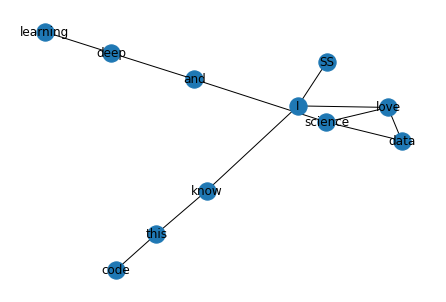

In [69]:
nx.draw(prob_G, with_labels = True)

### 중심성 지수

In [71]:
nx.degree_centrality(G)

{'SS': 0.1,
 'I': 0.30000000000000004,
 'love': 0.30000000000000004,
 'data': 0.2,
 'science': 0.30000000000000004,
 'and': 0.2,
 'deep': 0.2,
 'learning': 0.1,
 'know': 0.2,
 'this': 0.2,
 'code': 0.1}

In [72]:
nx.eigenvector_centrality(G, weight = 'weight')

{'SS': 0.5218381818736308,
 'I': 0.6738972217471829,
 'love': 0.4289818764298256,
 'data': 0.15246421196699775,
 'science': 0.16168537263306304,
 'and': 0.04494390325361216,
 'deep': 0.012430000571815347,
 'learning': 0.003208839905750058,
 'know': 0.18731685432677989,
 'this': 0.05180118197737535,
 'code': 0.013370793702236268}

In [73]:
nx.betweenness_centrality(G)

{'SS': 0.0,
 'I': 0.6,
 'love': 0.5555555555555556,
 'data': 0.0,
 'science': 0.4666666666666667,
 'and': 0.35555555555555557,
 'deep': 0.2,
 'learning': 0.0,
 'know': 0.35555555555555557,
 'this': 0.2,
 'code': 0.0}

In [74]:
def get_node_size(node_values):
    nsize = np.array([v for v in node_values])
    nsize = 1000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))
    
    return nsize

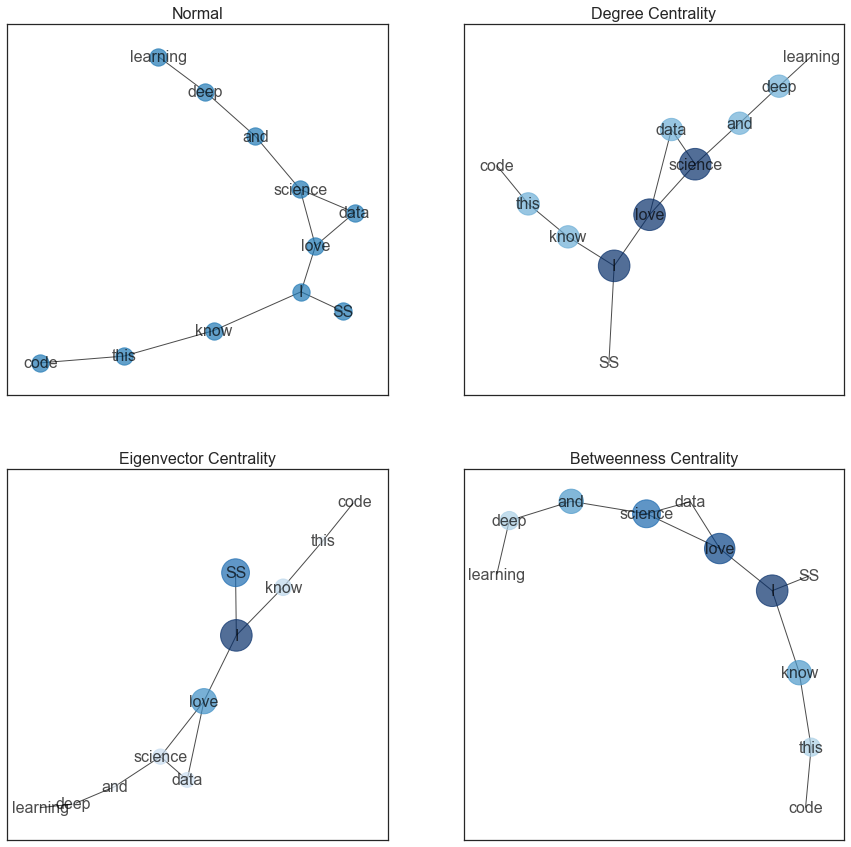

In [75]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')


dc = nx.degree_centrality(G).values()
ec = nx.eigenvector_centrality(G, weight= 'weight').values()
bc = nx.betweenness_centrality(G).values()


plt.figure(figsize= (15, 15))
plt.axis('off')

plt.subplot(221)
plt.title('Normal', fontsize =16)
nx.draw_networkx(G, font_size = 16, alpha = 0.7 , cmap = plt.cm.Blues)

plt.subplot(222)
plt.title('Degree Centrality', fontsize =16)
nx.draw_networkx(G, font_size = 16, 
                 node_color = list(dc), node_size = get_node_size(dc), 
                 alpha = 0.7 , cmap = plt.cm.Blues)


plt.subplot(223)
plt.title('Eigenvector Centrality', fontsize =16)
nx.draw_networkx(G, font_size = 16, 
                 node_color = list(ec), node_size = get_node_size(ec),
                 alpha = 0.7 , cmap = plt.cm.Blues)



plt.subplot(224)
plt.title('Betweenness Centrality', fontsize =16)
nx.draw_networkx(G, font_size = 16, 
                 node_color = list(bc), node_size = get_node_size(bc),
                 alpha = 0.7 , cmap = plt.cm.Blues)

plt.show()

